# Model `ELBMFPyTorch`

The PyTorch implementation by the author.
https://github.com/sdall/elbmf-python

`ELBMFPyTorch` is a wrapper of the PyTorch implementation from the author of the ELBMF paper.

This is experimental and will be removed in the future. The final version of the model will be `models/ELBMF.py`.

In [7]:
# use project files rather than the installed PyBMF
 
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

from PyBMF.models.ELBMFPyTorch import ELBMF
from PyBMF.utils import show_matrix

import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load `CustomData`

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\nieht\AppData\Local\Temp\ipykernel_8256\1799058625.py:6: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\PyBMF-bulky\data\data-elbmf\Brain_Cerebellum-z.tsv', header=None, sep='\t')


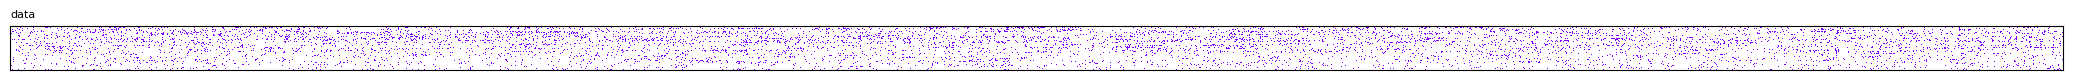

Using custom data of shape: (644, 30243), type: <class 'scipy.sparse._csr.csr_matrix'>
[I] Sampling axis 1 to size 1000
[I]   sampling seed: 1000
[I]   sampling from: (644, 30243)
[I]   sampling to  : (644, 1000)


<Figure size 640x480 with 0 Axes>

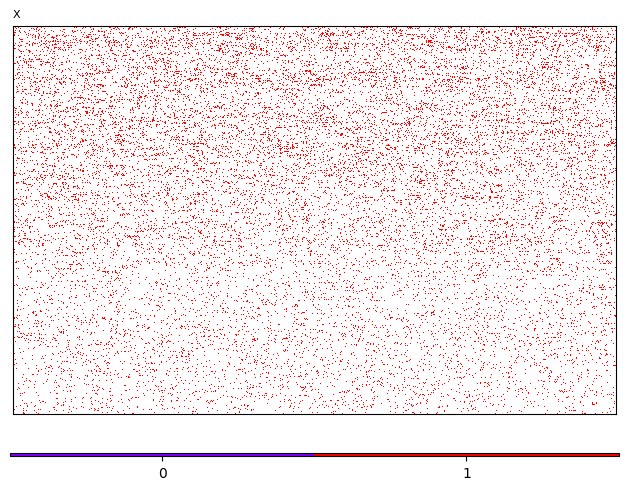

<Figure size 640x480 with 0 Axes>

In [8]:
# loading real-world data from datasets of ELBMF-Julia
# download and extract .tsv file from https://eda.rg.cispa.io/prj/elbmf/

# make sure the data is correctly parsed (right header, sep, etc.)

df = pd.read_csv('D:\PyBMF-bulky\data\data-elbmf\Brain_Cerebellum-z.tsv', header=None, sep='\t')

X = csr_matrix(df.astype(pd.SparseDtype("float64", 0)).sparse.to_coo())
show_matrix([(X, [0, 0], 'data')])

# wrap it with CustomData(), so that it can be easily cropped and displayed

from PyBMF.datasets import CustomData

data = CustomData(X, name="Brain_Cerebellum-z")
data.load(overwrite_cache=True)

data.sample(factor_id=1, n_samples=1000, seed=1000)
data.show_matrix(scaling=0.25)

# Load synthetic data

In [9]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

# Load `MovieLensData`

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


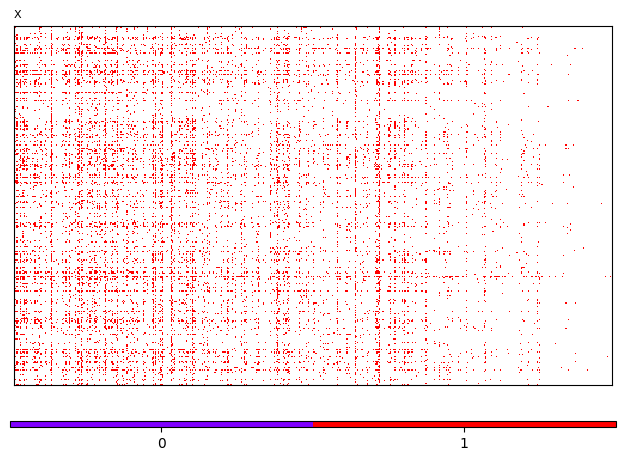

<Figure size 640x480 with 0 Axes>

In [10]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

# Split and negative sampling

Here `NoSplit` is used, which means `X_train`, `X_val` and `X_test` point to the same data `data.X`.

With `split.negative_sample`, zeros are added to the sparse matrix. The number of zeros is set to be equal to the number of ones, which is `split.pos_size`.

In [11]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1725618000
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1725618000
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


# `ELBMFPyTorch`

[I] k            : 100
[I] U            : None
[I] V            : None
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] max_iter     : 1000
[I] min_diff     : 1e-08
[I] beta         : 0
[I] seed         : 1725618594
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-09-06 18-29-54-094261 ELBMF
[I] U, V existed. Skipping initialization.

============= parameters of elbmf() ===============
X:  torch.Size([300, 500]) <class 'torch.Tensor'>
n_components:  100
U:  (300, 100) <class 'numpy.ndarray'>
V:  (500, 100) <class 'numpy.ndarray'>
l1reg:  0.01
l2reg:  0.02
regularization_rate:  <function ELBMF._fit.<locals>.<lambda> at 0x000002CF0EC21760>
maxiter:  1000
tolerance:  1e-08
beta:  0
callback:  None
with_rounding:  False
seed:  1725618594



[I] error: 2053.3787, U: [0.0000, 3.6201], V: [0.0000, 4.3515]: 100%|██████████| 1000/1000 [00:40<00:00, 24.88it/s]


[I] time elapsed :  40s


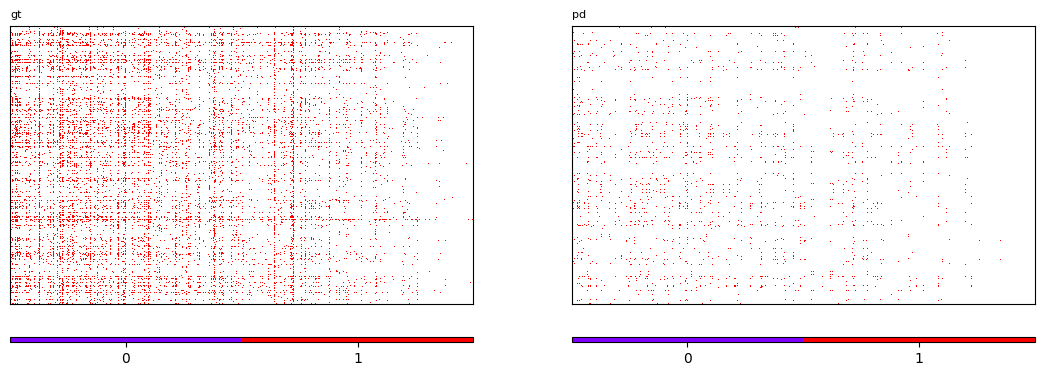

<Figure size 640x480 with 0 Axes>

In [15]:
from PyBMF.utils import show_matrix, to_dense, to_sparse, binarize, matmul

k = 100
reg_l1 = 0.01
reg_l2 = 0.02
reg_growth = 1.0002 # 1.02
max_iter = 1000
min_diff = 1e-8
beta = 0 # 0.0001
seed = None
task = 'reconstruction'

# init U, V with uniform distribution
U, V, init_method = None, None, 'uniform'

# init U, V by importing results from NMF
# U, V, init_method = model_nmf.U.copy(), model_nmf.V.copy(), 'custom'

model = ELBMF(k=k, U=U, V=V, init_method=init_method, reg_l1=reg_l1, reg_l2=reg_l2, reg_growth=reg_growth, max_iter=max_iter, min_diff=min_diff, beta=beta, seed=seed)
model.fit(X_train=X_train, task=task, save_model=False, show_logs=False, show_result=True)

# Check reconstructed matrix

Insert the script into ELBMFNumPy.py to show intermediate results.

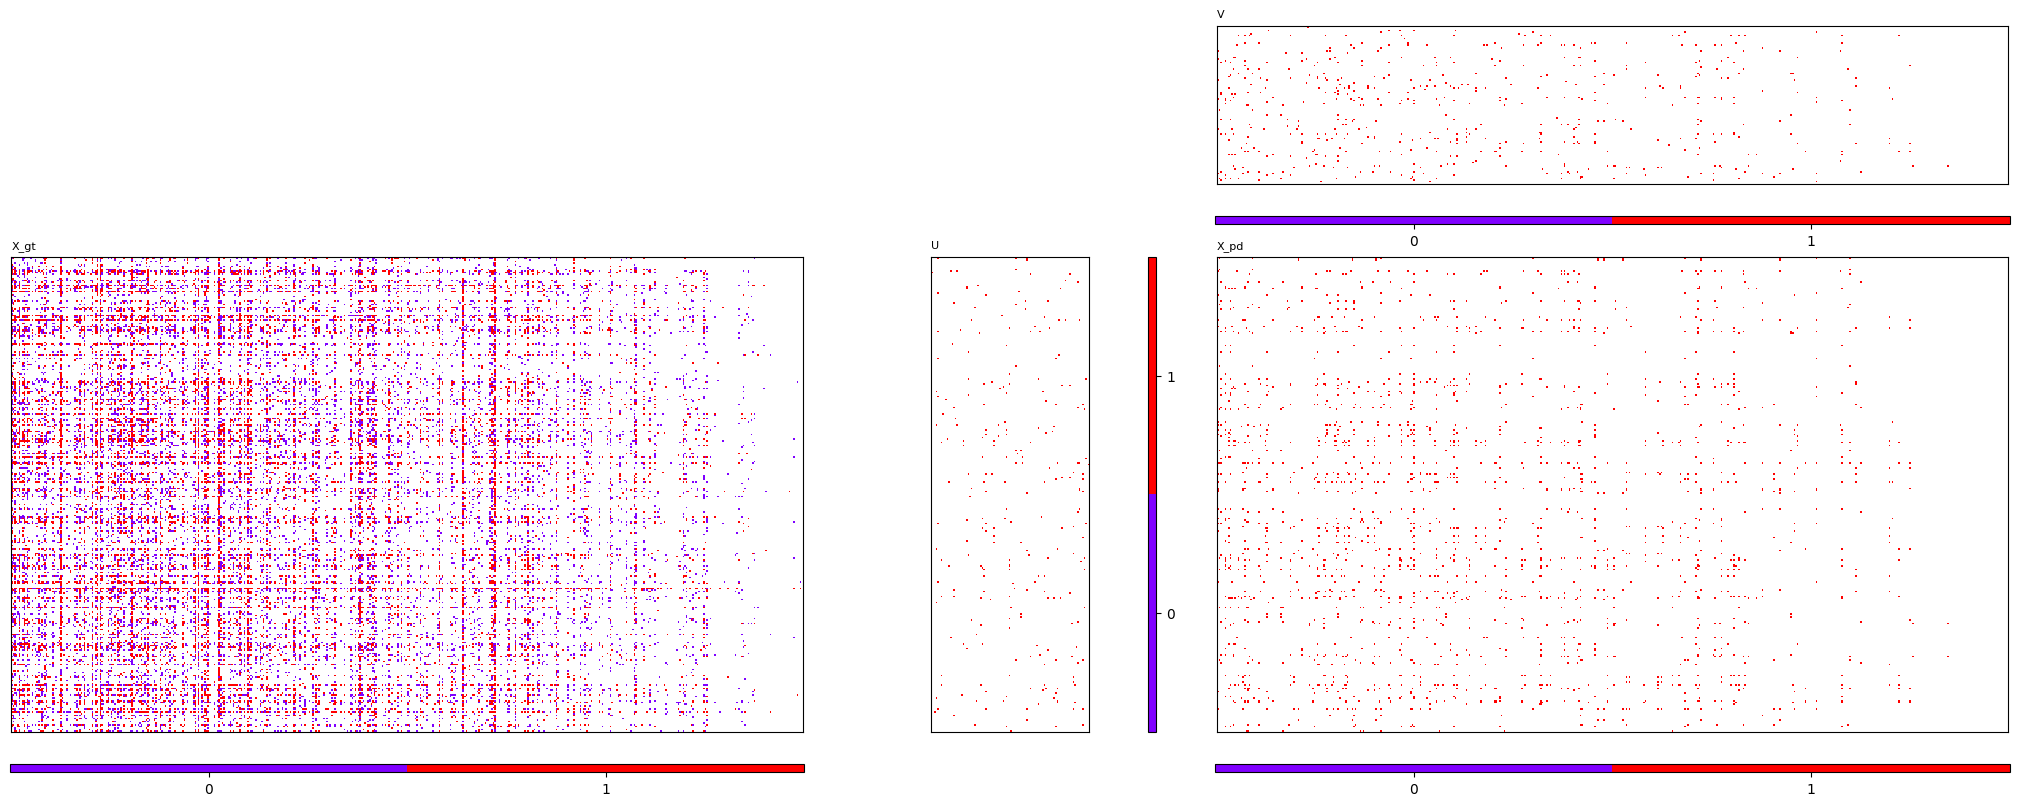

<Figure size 640x480 with 0 Axes>

In [18]:
U = to_sparse(binarize(model.U))
V = to_sparse(binarize(model.V)).T
X_pd = matmul(U, V, sparse=True, boolean=True)

show_matrix([(U, [1, 1], 'U'), (V, [0, 2], 'V'), (X_pd, [1, 2], 'X_pd'), (X_train, [1, 0], 'X_gt')], colorbar=True, discrete=True, clim=[0, 1])

# Check real-valued loss

In [13]:
model.logs['updates']

train          
                                                 0          
                  time iter            F      RMSE       MAE
0    06/09/24 06:20:00    0  7354.854004  0.221433  0.110664
1    06/09/24 06:20:00    1  7215.178711  0.219321  0.105591
2    06/09/24 06:20:00    2  7186.931641  0.218891  0.102599
3    06/09/24 06:20:00    3  7163.059082  0.218528  0.101092
4    06/09/24 06:20:00    4  7132.258301  0.218057  0.100265
..                 ...  ...          ...       ...       ...
995  06/09/24 06:20:40  995  2062.565186  0.117263  0.045275
996  06/09/24 06:20:40  996  2062.416016  0.117258  0.045270
997  06/09/24 06:20:40  997  2062.264893  0.117254  0.045268
998  06/09/24 06:20:41  998  2062.116211  0.117250  0.045263
999  06/09/24 06:20:41  999  2061.967041  0.117246  0.045260

[1000 rows x 5 columns]

# Check Boolean error

In [14]:
model.logs['boolean']

train                              
                                    0                              
                  time iter    Recall Precision  Accuracy        F1
0    06/09/24 06:20:00    0  0.000000  0.000000  0.928307  0.000000
1    06/09/24 06:20:00    1  0.000000  0.000000  0.928307  0.000000
2    06/09/24 06:20:00    2  0.000000  0.000000  0.928307  0.000000
3    06/09/24 06:20:00    3  0.000000  0.000000  0.928307  0.000000
4    06/09/24 06:20:00    4  0.000000  0.000000  0.928307  0.000000
..                 ...  ...       ...       ...       ...       ...
995  06/09/24 06:20:40  995  0.157151  0.882968  0.938080  0.266814
996  06/09/24 06:20:40  996  0.157151  0.882968  0.938080  0.266814
997  06/09/24 06:20:40  997  0.156872  0.882784  0.938060  0.266403
998  06/09/24 06:20:41  998  0.156593  0.882600  0.938040  0.265993
999  06/09/24 06:20:41  999  0.156593  0.882600  0.938040  0.265993

[1000 rows x 6 columns]